In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [175]:
pd.set_option('display.max_columns', None)

In [176]:
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv',parse_dates=['policy_bind_date','incident_date'])
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-10-01,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [177]:
df.shape

(1000, 40)

In [178]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [179]:
df.drop(['_c39','policy_number','incident_location'],axis= 1,inplace=True)
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-10-01,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [10]:
df.nunique()

months_as_customer             391
age                             46
policy_bind_date               951
policy_state                     3
policy_csl                       3
policy_deductable                3
policy_annual_premium          991
umbrella_limit                  11
insured_zip                    995
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_date                   60
incident_type                    4
collision_type                   4
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  3
bodily_injuries                  3
witnesses                        4
police_report_availa

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_bind_date             1000 non-null   datetime64[ns]
 3   policy_state                 1000 non-null   object        
 4   policy_csl                   1000 non-null   object        
 5   policy_deductable            1000 non-null   int64         
 6   policy_annual_premium        1000 non-null   float64       
 7   umbrella_limit               1000 non-null   int64         
 8   insured_zip                  1000 non-null   int64         
 9   insured_sex                  1000 non-null   object        
 10  insured_education_level      1000 non-null   object        
 11  insured_occupation           1000 non-null  

In [181]:
df.replace('?',np.NaN,inplace=True)
df.isnull().sum()

months_as_customer               0
age                              0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_availa

In [182]:
for i in df.columns:
    vc=df[i].value_counts()
    print(i)
    print(vc)
    print('=='*50)

months_as_customer
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64
age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64
policy_bind_date
2006-01-01    3
1992-04-28    3
1992-05-08    3
1991-12-14    2
2004-09-08    2
             ..
2014-03-06    1
1998-12-12    1
1999-02-18    1
1997-10-30    1
1996-11-11    1
Name: policy_bind_date, Length: 951, dtype: int64
policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
policy_csl
250/500     351
100/300     349
500/1000    300
Name: poli

- In umbrella_limit we see only one row with a negative value, which is probably a mistake. Hence dropping the row

In [183]:
df[df.umbrella_limit==-1000000 ]

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
290,284,42,1995-04-05,OH,100/300,500,1338.54,-1000000,438178,MALE,Associate,machine-op-inspct,kayaking,wife,0,0,2015-01-29,Single Vehicle Collision,Side Collision,Major Damage,Ambulance,NC,Arlington,13,1,YES,0,1,NaN,94160,8560,17120,68480,Chevrolet,Malibu,1996,N


In [184]:
df.drop(index=290,inplace= True)
df.reset_index()

,index,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,2,134,29,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-10-01,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NaN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,NaN,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,3,38,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2015-02-22,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,20,1,YES,0,1,NaN,87200,17440,8720,61040,Honda,Accord,2006,N
995,996,285,41,2014-05-01,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,2015-01-24,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,23,1,YES,2,3,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N
996,997,130,34,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,2015-01-23,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,4,3,NaN,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
997,998,458,62,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2015-02-26,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,2,1,NaN,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [185]:
df.collision_type.mode()[0]

'Rear Collision'

In [186]:
df[df.collision_type.isnull()]

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,NaN,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
13,121,34,2012-10-26,OH,100/300,1000,936.61,0,464652,FEMALE,MD,armed-forces,bungie-jumping,wife,52800,-32800,2015-08-01,Parked Car,NaN,Minor Damage,None,SC,Springfield,5,1,NO,1,1,NO,7280,1120,1120,5040,Toyota,Highlander,2010,N
26,257,43,1990-09-20,IN,100/300,2000,1322.10,0,436984,MALE,High School,prof-specialty,golf,own-child,0,-29200,2015-01-28,Parked Car,NaN,Minor Damage,Police,PA,Arlington,4,1,YES,1,3,YES,9020,1640,820,6560,Toyota,Camry,2005,N
27,202,34,2002-07-18,IN,100/300,500,848.07,3000000,607730,MALE,JD,exec-managerial,chess,not-in-family,31000,-30200,2015-07-01,Vehicle Theft,NaN,Minor Damage,None,VA,Northbrook,5,1,YES,2,1,NaN,5720,1040,520,4160,Suburu,Forrestor,2003,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,163,37,2009-11-25,IN,500/1000,1000,1200.33,4000000,477631,FEMALE,High School,craft-repair,cross-fit,own-child,0,-36400,2015-06-02,Vehicle Theft,NaN,Minor Damage,Police,WV,Springfield,7,1,NaN,2,1,YES,3900,390,780,2730,Volkswagen,Jetta,2008,Y
969,398,55,1990-05-25,OH,250/500,500,862.19,0,606858,MALE,High School,adm-clerical,movies,unmarried,69400,0,2015-02-23,Vehicle Theft,NaN,Trivial Damage,Police,SC,Northbend,7,1,NaN,2,3,NaN,6600,600,1200,4800,Accura,MDX,2012,N
983,17,39,2006-10-28,IL,250/500,1000,840.95,0,431202,FEMALE,JD,adm-clerical,hiking,unmarried,32500,-80800,2015-02-26,Parked Car,NaN,Trivial Damage,Police,SC,Arlington,9,1,NaN,2,1,NaN,3440,430,430,2580,Suburu,Legacy,2002,N
994,141,30,2007-03-24,IN,500/1000,1000,1347.04,0,430665,MALE,High School,sales,bungie-jumping,own-child,0,-82100,2015-01-22,Parked Car,NaN,Minor Damage,None,SC,Northbend,6,1,NaN,1,2,YES,6480,540,1080,4860,Honda,Civic,1996,N


In [187]:
df.property_damage.mode()[0]

'NO'

In [188]:
df[df.property_damage.isnull()]

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-10-01,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NaN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
6,137,34,2000-04-06,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,2015-01-13,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,0,3,NaN,0,0,NaN,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,1990-03-02,IL,100/300,1000,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0,0,2015-02-27,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,23,3,NaN,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
16,70,26,2005-08-06,OH,500/1000,1000,1199.44,5000000,619884,MALE,College,machine-op-inspct,hiking,own-child,63600,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Major Damage,Other,NY,Riverwood,0,3,NaN,1,2,YES,52110,5790,5790,40530,Nissan,Maxima,2012,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,124,28,2001-08-12,OH,250/500,1000,1235.14,0,443567,MALE,MD,exec-managerial,camping,husband,0,-32100,2015-02-17,Multi-vehicle Collision,Side Collision,Total Loss,Other,OH,Hillsdale,20,3,NaN,0,1,NaN,60200,6020,6020,48160,Volkswagen,Passat,2012,N
994,141,30,2007-03-24,IN,500/1000,1000,1347.04,0,430665,MALE,High School,sales,bungie-jumping,own-child,0,-82100,2015-01-22,Parked Car,NaN,Minor Damage,None,SC,Northbend,6,1,NaN,1,2,YES,6480,540,1080,4860,Honda,Civic,1996,N
997,130,34,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,2015-01-23,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,4,3,NaN,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2015-02-26,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,2,1,NaN,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [189]:
df.police_report_available.mode()[0]

'NO'

In [190]:
df[df.police_report_available.isnull()]

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
6,137,34,2000-04-06,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,2015-01-13,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,0,3,NaN,0,0,NaN,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
9,212,42,2011-07-25,IL,100/300,500,1315.68,0,600983,MALE,PhD,priv-house-serv,camping,wife,0,-39300,2015-05-01,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,14,1,NO,2,1,NaN,42300,4700,4700,32900,Saab,92x,1996,N
10,235,42,2002-05-26,OH,100/300,500,1253.12,4000000,462283,FEMALE,Masters,exec-managerial,dancing,other-relative,38400,0,2015-06-01,Single Vehicle Collision,Front Collision,Total Loss,Police,NY,Northbend,22,1,YES,2,2,NaN,87010,7910,15820,63280,Ford,F150,2002,N
20,460,62,2002-06-25,IN,250/500,1000,1187.96,4000000,618845,MALE,JD,other-service,bungie-jumping,own-child,0,0,2015-01-01,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,20,3,NO,1,0,NaN,47160,0,5240,41920,Suburu,Impreza,2011,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,22,21,2007-04-07,IN,250/500,1000,1248.05,0,443550,FEMALE,High School,exec-managerial,movies,husband,37500,-54000,2015-02-15,Multi-vehicle Collision,Rear Collision,Total Loss,Police,SC,Arlington,3,3,YES,1,2,NaN,53280,5920,0,47360,Chevrolet,Malibu,2015,N
993,124,28,2001-08-12,OH,250/500,1000,1235.14,0,443567,MALE,MD,exec-managerial,camping,husband,0,-32100,2015-02-17,Multi-vehicle Collision,Side Collision,Total Loss,Other,OH,Hillsdale,20,3,NaN,0,1,NaN,60200,6020,6020,48160,Volkswagen,Passat,2012,N
995,3,38,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2015-02-22,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,20,1,YES,0,1,NaN,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,2014-05-01,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,2015-01-24,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,23,1,YES,2,3,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N


#### Seperating day date and month

In [191]:
df['policy_date']= pd.to_datetime(df['policy_bind_date'],format='%Y-%m-%d',).dt.day
df['policy_month']= pd.to_datetime(df['policy_bind_date'],format='%Y-%m-%d').dt.month
df['policy_year']= pd.to_datetime(df['policy_bind_date'],format='%Y-%m-%d').dt.year


In [192]:
df.drop('policy_bind_date',axis=1,inplace= True)

In [193]:
df['incident_day']= pd.to_datetime(df['incident_date'],format='%Y-%m-%d',).dt.day
df['incident_month']= pd.to_datetime(df['incident_date'],format='%Y-%m-%d').dt.month
df['incident_year']= pd.to_datetime(df['incident_date'],format='%Y-%m-%d').dt.year
df.drop('incident_date',axis=1,inplace= True)

In [194]:
df['incident_year'].unique() # this column only contains 2015 so dropping it

array([2015], dtype=int64)

In [195]:
df.drop('incident_year',axis=1,inplace= True)

In [196]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_date,policy_month,policy_year,incident_day,incident_month
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,17,10,2014,25,1
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,27,6,2006,21,1
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,9,6,2000,22,2
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NaN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,25,5,1990,1,10
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,NaN,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,6,6,2014,17,2


### Handling missing Values

In [197]:
#replacing missing values with the mode
df.police_report_available= df.police_report_available.fillna(df.police_report_available.mode()[0])
df.collision_type= df.collision_type.fillna(df.collision_type.mode()[0])
df.property_damage= df.property_damage.fillna(df.property_damage.mode()[0])

In [198]:
categorical=[]
for i in df.columns:
    if df[i].dtype=='object':
        categorical.append(i)
        

In [199]:
categorical=['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_stateincident_city','property_damage','police_report_available','auto_make','auto_model','fraud_reported','policy_deductable','umbrella_limit','insured_zip','witnesses','bodily_injuries','number_of_vehicles_involved']

In [200]:
numeric=[]
for i in df.columns:
    if df[i].dtype=='int64'and 'float64':
        numeric.append(i)
        

In [201]:
numeric = df[['months_as_customer','age','capital-gains','capital-loss','incident_hour_of_the_day','total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_year','policy_date','policy_month','policy_year','incident_day','incident_month']]

## Data Visualization

N    752
Y    247
Name: fraud_reported, dtype: int64


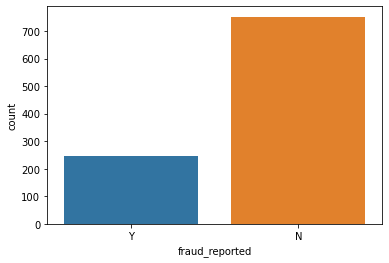

In [202]:
sns.countplot(x='fraud_reported',data=df)
print(df['fraud_reported'].value_counts())

- we have an imbalanced dataset here which will be handled later

<AxesSubplot:ylabel='Frequency'>

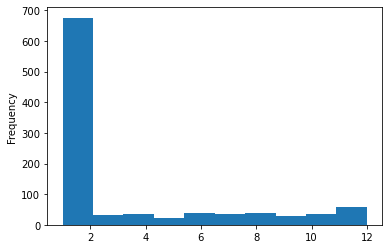

In [203]:
df['incident_month'].plot(kind='hist')

- Frequency of cases in the first and second month are found to be high based on this dataset 

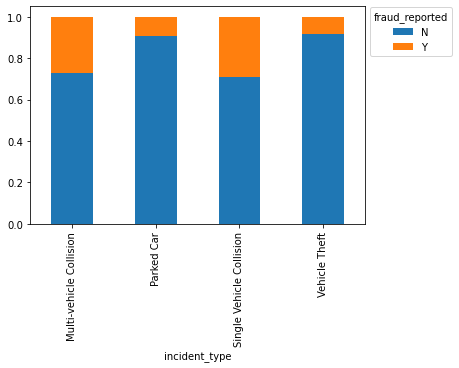

In [39]:
(pd.crosstab(df['incident_type'],df['fraud_reported'], 
             normalize='index').plot.bar(stacked=True).legend(bbox_to_anchor=(1, 1.02),loc='upper left',title='fraud_reported'))

- More fraud cases were reported when Multi-Vehicle Collision and Single-Vehicle Collision was involved

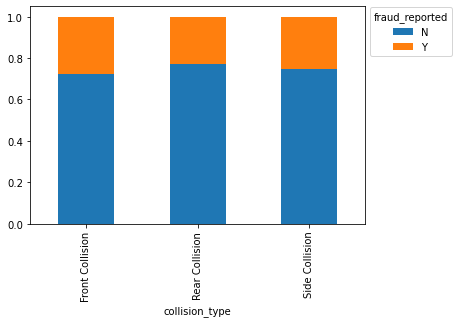

In [40]:
(pd.crosstab(df['collision_type'],df['fraud_reported'], 
             normalize='index').plot.bar(stacked=True).legend(bbox_to_anchor=(1, 1.02),loc='upper left',title='fraud_reported'))

- There doesn't seem much difference to be present based on collision type and fraud claim

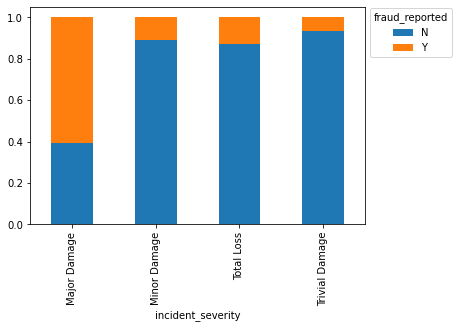

In [41]:
(pd.crosstab(df['incident_severity'],df['fraud_reported'], 
             normalize='index').plot.bar(stacked=True).legend(bbox_to_anchor=(1, 1.02),loc='upper left',title='fraud_reported'))

- Most of the fraud cases were reported when the cases involved major damage.
- About 60% cases were found to be fraud claim when Major Damage was involved

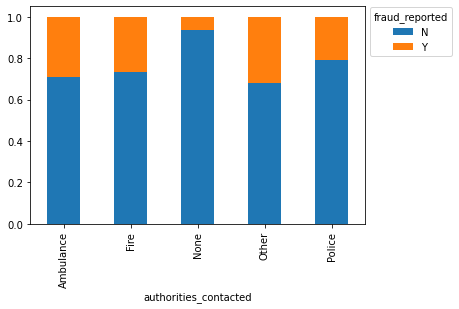

In [42]:
(pd.crosstab(df['authorities_contacted'],df['fraud_reported'], 
             normalize='index').plot.bar(stacked=True).legend(bbox_to_anchor=(1, 1.02),loc='upper left',title='fraud_reported'))

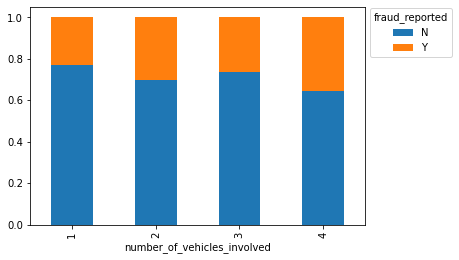

In [43]:
(pd.crosstab(df['number_of_vehicles_involved'],df['fraud_reported'], 
             normalize='index').plot.bar(stacked=True).legend(bbox_to_anchor=(1, 1.02),loc='upper left',title='fraud_reported'))

- About 38% faudulent claims were made when 4 vehicles were involved in the incident.

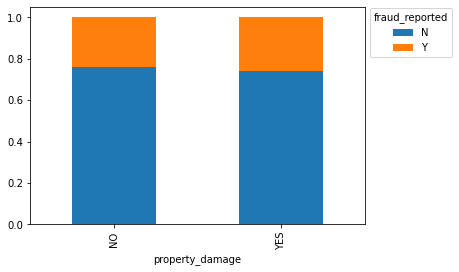

In [45]:
(pd.crosstab(df['property_damage'],df['fraud_reported'], 
             normalize='index').plot.bar(stacked=True).legend(bbox_to_anchor=(1, 1.02),loc='upper left',title='fraud_reported'))

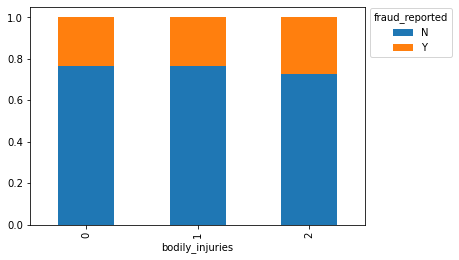

In [46]:
(pd.crosstab(df['bodily_injuries'],df['fraud_reported'], 
             normalize='index').plot.bar(stacked=True).legend(bbox_to_anchor=(1, 1.02),loc='upper left',title='fraud_reported'))

- about 23-24% were fraud claims where the bodily injuries claimed as 2 

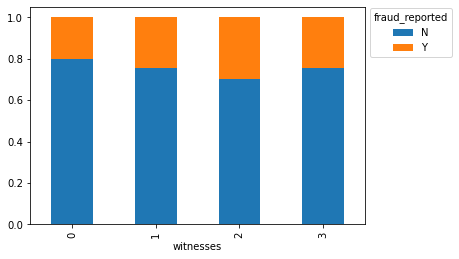

In [47]:
(pd.crosstab(df['witnesses'],df['fraud_reported'], 
             normalize='index').plot.bar(stacked=True).legend(bbox_to_anchor=(1, 1.02),loc='upper left',title='fraud_reported'))

- About 20% of the cases were found to be fraudulent, when there were no witnesses

Text(0.5, 1.0, 'Amount was claimed based Vs fraud reported')

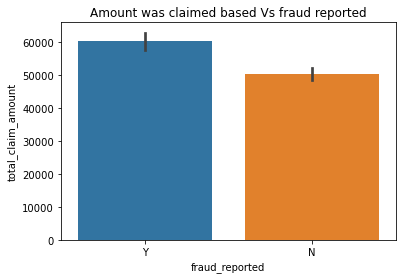

In [59]:
sns.barplot(x='fraud_reported',y='total_claim_amount',data=df)
plt.title('Amount was claimed based Vs fraud reported')

- More fraud claims were found in cases where more amount was claimed

Text(0.5, 1.0, 'Amount was claimed based on the severity of the incident')

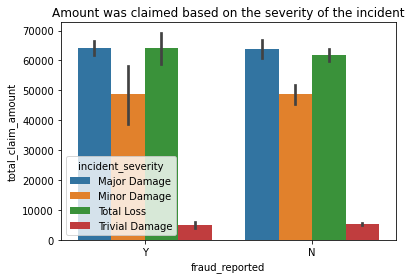

In [58]:
sns.barplot(x='fraud_reported',y='total_claim_amount', hue='incident_severity',data=df)
plt.title('Amount was claimed based on the severity of the incident')

- There is no significant variation here 

### Distribution of data

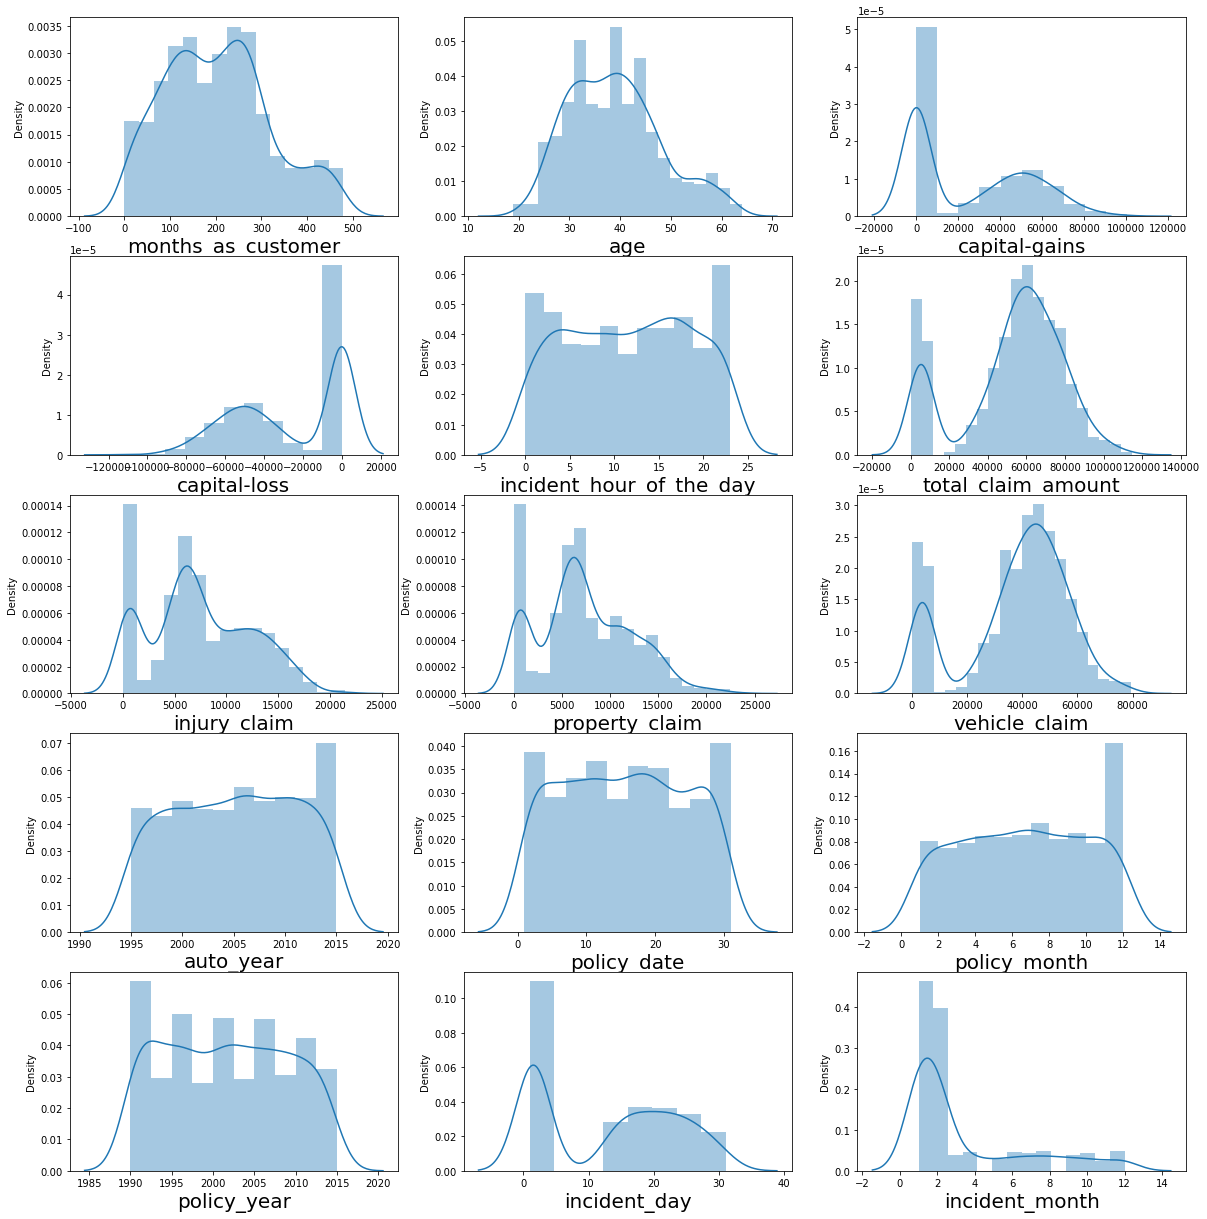

In [204]:
plt.figure(figsize =(20,30), facecolor='white')
plotnumber=1
for i in numeric:
    if plotnumber <= 21:
        ax = plt.subplot(7,3,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=20)
    
    plotnumber +=1
plt.show()

#### Descriptive Statistics

In [205]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_date,policy_month,policy_year,incident_day,incident_month
count,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,203.873874,38.944945,1136.636637,1256.323934,1.103103e+06,501277.587588,25151.251251,-26820.520521,11.642643,1.839840,0.992993,1.487487,52720.500501,7432.292292,7389.839840,37898.368368,2005.112112,15.458458,6.561562,2001.610611,13.068068,3.409409
std,115.142928,9.144354,611.839681,244.275843,2.297594e+06,71709.740537,27874.792269,28105.366259,6.954722,1.019044,0.819936,1.111785,26382.199299,4883.266266,4817.316312,18870.924206,6.011966,8.848424,3.392489,7.361107,10.436245,3.277046
min,0.000000,19.000000,500.000000,433.330000,0.000000e+00,430104.000000,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000,1.000000,1.000000,1990.000000,1.000000,1.000000
25%,115.500000,32.000000,500.000000,1089.185000,0.000000e+00,448451.000000,0.000000,-51500.000000,6.000000,1.000000,0.000000,1.000000,41775.000000,4290.000000,4440.000000,30275.000000,2000.000000,8.000000,4.000000,1995.000000,2.000000,1.000000
50%,199.000000,38.000000,1000.000000,1257.040000,0.000000e+00,466498.000000,0.000000,-24100.000000,12.000000,1.000000,1.000000,1.000000,57970.000000,6770.000000,6750.000000,42080.000000,2005.000000,16.000000,7.000000,2002.000000,15.000000,2.000000
75%,276.000000,44.000000,2000.000000,1415.710000,0.000000e+00,603254.000000,51050.000000,0.000000,17.000000,3.000000,2.000000,2.000000,70550.000000,11310.000000,10870.000000,50775.000000,2010.000000,23.000000,9.000000,2008.000000,22.000000,5.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000,31.000000,12.000000,2015.000000,31.000000,12.000000


- Based on  discriptive statistics we can observe presence of ouliers

### Encoding

In [206]:
from sklearn.preprocessing import LabelEncoder

In [207]:
enc=LabelEncoder()

In [208]:
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [209]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_date,policy_month,policy_year,incident_day,incident_month
0,328,48,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,2,2,0,4,4,1,5,1,1,1,2,1,71610,6510,13020,52080,10,1,2004,1,17,10,2014,25,1
1,228,42,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,3,1,1,4,5,5,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1,27,6,2006,21,1
2,134,29,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,0,1,1,4,1,1,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,0,9,6,2000,22,2
3,256,41,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,5,1,0,1,2,0,63400,6340,6340,50720,3,34,2014,1,25,5,1990,1,10
4,228,44,0,2,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,20,1,0,0,1,0,6500,1300,650,4550,0,31,2009,0,6,6,2014,17,2


- we have encoded all the data

### Correlation

<AxesSubplot:>

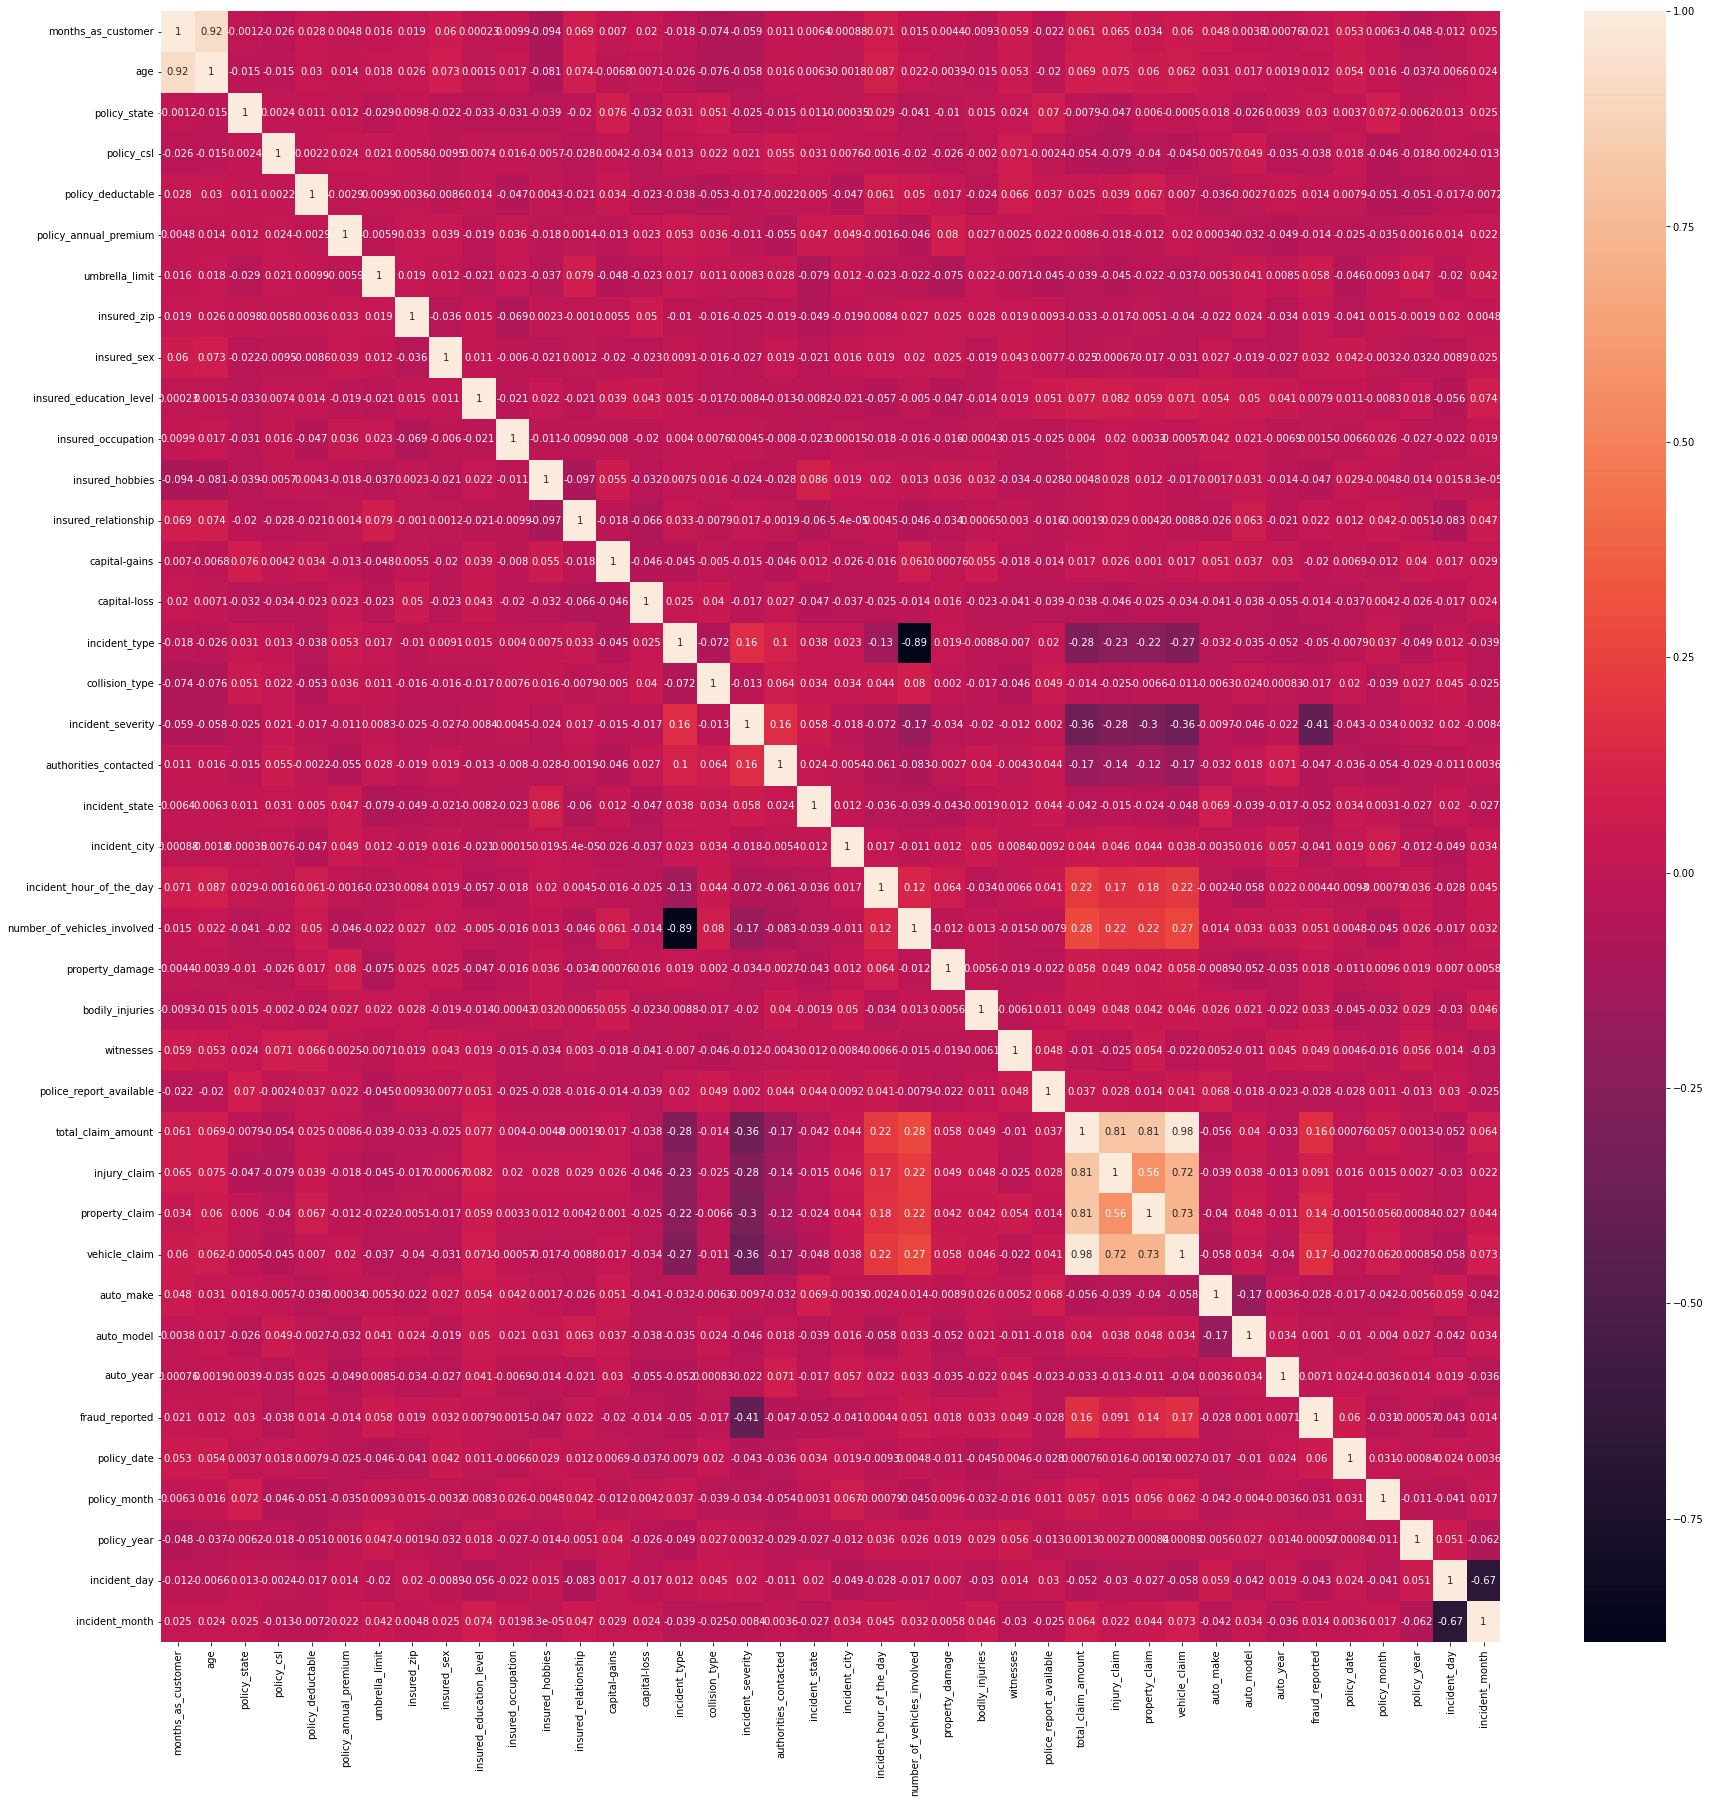

In [210]:
plt.figure(figsize=(30,30))
corr= df.corr()
sns.heatmap(corr,annot=True)

In [211]:
corr_matrix= df.corr()
corr_matrix['fraud_reported'].sort_values(ascending= False)

fraud_reported                 1.000000
vehicle_claim                  0.171230
total_claim_amount             0.164781
property_claim                 0.139297
injury_claim                   0.091124
policy_date                    0.060017
umbrella_limit                 0.058131
number_of_vehicles_involved    0.051392
witnesses                      0.049258
bodily_injuries                0.033213
insured_sex                    0.031514
policy_state                   0.030138
insured_relationship           0.021955
months_as_customer             0.020951
insured_zip                    0.018874
property_damage                0.018097
policy_deductable              0.014231
incident_month                 0.014080
age                            0.012338
insured_education_level        0.007946
auto_year                      0.007070
incident_hour_of_the_day       0.004429
insured_occupation             0.001471
auto_model                     0.001013
policy_year                   -0.000574


### Outliers Handling

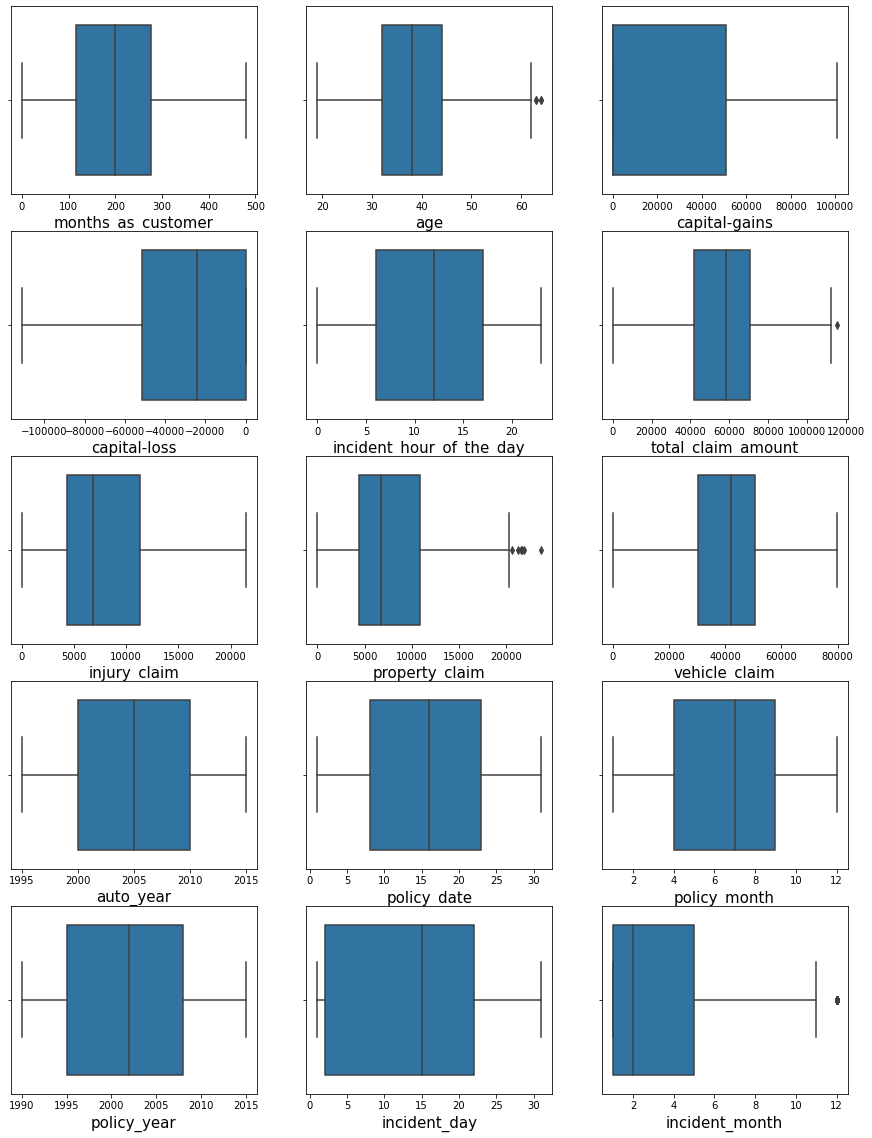

In [212]:
plt.figure(figsize =(15,20), facecolor='white')
plotnumber = 1
for column in numeric :
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(numeric[column])
        plt.xlabel(column,fontsize=15)
        
    
    plotnumber +=1
plt.show()

In [213]:
import scipy
from scipy.stats import zscore

In [214]:
np.abs(zscore(numeric)<3).all().all()

False

In [215]:
z=np.abs(zscore(numeric))

In [216]:
df=df[(z<3).all(axis=1)]
df.shape

(997, 40)

### Spliting Data

In [217]:
X= df.drop('fraud_reported',axis=1)
y= df['fraud_reported']

### Skewness

In [218]:
X.skew()

months_as_customer             0.365101
age                            0.477884
policy_state                  -0.022506
policy_csl                     0.089192
policy_deductable              0.477579
policy_annual_premium          0.005983
umbrella_limit                 1.802879
insured_zip                    0.817213
insured_sex                    0.147055
insured_education_level       -0.001086
insured_occupation            -0.059461
insured_hobbies               -0.060660
insured_relationship           0.080007
capital-gains                  0.480274
capital-loss                  -0.374915
incident_type                  0.103439
collision_type                -0.030685
incident_severity              0.276345
authorities_contacted         -0.123504
incident_state                -0.151520
incident_city                  0.051077
incident_hour_of_the_day      -0.034755
number_of_vehicles_involved    0.502025
property_damage                0.864298
bodily_injuries                0.016663


- if the skew value is greater than +- 0.5 it will be required to be handled

In [219]:
i = ['total_claim_amount','vehicle_claim', 'incident_month']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()

X[i]= scaler.fit_transform(X[i].values)
X.skew()

months_as_customer             0.365101
age                            0.477884
policy_state                  -0.022506
policy_csl                     0.089192
policy_deductable              0.477579
policy_annual_premium          0.005983
umbrella_limit                 1.802879
insured_zip                    0.817213
insured_sex                    0.147055
insured_education_level       -0.001086
insured_occupation            -0.059461
insured_hobbies               -0.060660
insured_relationship           0.080007
capital-gains                  0.480274
capital-loss                  -0.374915
incident_type                  0.103439
collision_type                -0.030685
incident_severity              0.276345
authorities_contacted         -0.123504
incident_state                -0.151520
incident_city                  0.051077
incident_hour_of_the_day      -0.034755
number_of_vehicles_involved    0.502025
property_damage                0.864298
bodily_injuries                0.016663


- skewness in numeric data is mostly treated

## Scaling 

In [220]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

x= scaler.fit_transform(X)

In [221]:
x = pd.DataFrame(x, index= X.index,columns= X.columns)
x.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,policy_date,policy_month,policy_year,incident_day,incident_month
0,1.077247,0.989137,1.189433,0.061123,-0.223182,0.615753,-0.480946,-0.490005,1.076108,0.529259,-1.158261,1.280525,-1.435948,1.014820,0.956516,0.766204,1.347085,-1.261429,1.196791,0.349646,-0.962412,-0.956934,-0.824233,1.520622,0.011021,0.464342,1.478277,0.720188,-0.187774,1.179958,0.757261,0.853936,-1.647790,-0.187206,0.176779,1.012821,1.684650,1.141933,-1.101727
1,0.207831,0.332930,-0.014491,0.061123,1.412936,-0.243457,1.694657,-0.461469,1.076108,0.529259,-0.162970,0.928288,-0.245395,-0.901101,0.956516,1.691029,-0.027576,-0.197432,1.196791,0.813823,0.996801,-0.525231,-0.824233,-0.657625,-1.209825,-1.337016,-0.676463,-1.775450,-1.361172,-1.375630,-1.784958,0.358086,-0.659422,0.312289,1.308029,-0.165799,0.597797,0.758372,-1.101727
2,-0.609420,-1.088851,1.189433,-1.182547,1.412936,0.641281,1.694657,-0.985613,-0.929275,1.555855,1.081143,-1.361254,0.349882,0.360603,0.956516,-1.083446,-0.027576,-0.197432,1.196791,-1.042885,-0.962412,-0.669132,1.139351,-0.657625,1.231867,1.365021,-0.676463,-0.713394,0.055915,-0.734645,-0.817560,-0.633613,0.957906,0.312289,-0.728221,-0.165799,-0.217343,0.854262,-0.028765
3,0.451268,0.223562,-1.218414,0.061123,1.412936,0.651934,2.129777,1.492216,-0.929275,1.555855,-1.407084,-1.361254,0.945158,0.856657,-1.273685,0.766204,-1.402237,-1.261429,1.196791,-0.578708,-1.452215,-0.956934,-0.824233,-0.657625,0.011021,0.464342,-0.676463,0.395748,-0.222587,-0.214758,0.681190,-0.881538,1.317312,1.477778,1.081779,-0.460454,-1.575910,-1.159438,1.552065
4,0.207831,0.551666,-1.218414,1.304793,-0.223182,1.341015,2.129777,1.528360,1.076108,-1.523935,1.081143,-1.361254,0.945158,1.471334,-0.687542,1.691029,-0.027576,-0.197432,-0.110826,-1.042885,-1.452215,1.201580,-0.824233,-0.657625,-1.209825,-0.436337,-0.676463,-1.728134,-1.254685,-1.402773,-1.738215,-1.625313,1.047758,0.645286,-1.067595,-0.165799,1.684650,0.374810,-0.028765


- Scaling is done, we can move on to building the model

In [222]:
x1= x[['months_as_customer','policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make','incident_month']]

## Balancing the dataset

In [223]:
from imblearn.over_sampling import SMOTE
#We have to change our dataset into a balanced dataset from an imbalanced dataset.
oversample = SMOTE()
x1,y= oversample.fit_resample(x1,y)

1    750
0    750
Name: fraud_reported, dtype: int64


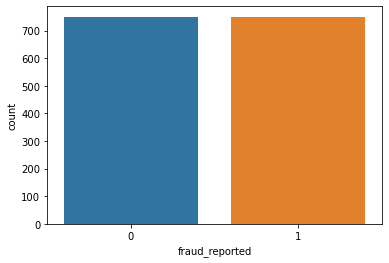

In [224]:
sns.countplot(y)
print(y.value_counts())

## Model Building

In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.model_selection import cross_val_score


In [226]:
#Finding the random state

MaxAcc = 0
MaxRS =0
for i in range(1,500):
    x1_train,x1_test,y_train,y_test=train_test_split(x1,y,test_size=.20,random_state=i)
    gb = GradientBoostingClassifier()
    gb.fit(x1_train,y_train)
    predgb= gb.predict(x1_test)
    acc= accuracy_score(y_test,predgb)
    print('accuracy',acc,'random_state',1)
    
    if acc>MaxAcc:
        MaxAcc=acc
        MaxRS= i
        print('accuracy',MaxAcc,'random_state',i)

accuracy 0.87 random_state 1
accuracy 0.87 random_state 1
accuracy 0.8933333333333333 random_state 1
accuracy 0.8933333333333333 random_state 2
accuracy 0.8866666666666667 random_state 1
accuracy 0.91 random_state 1
accuracy 0.91 random_state 4
accuracy 0.89 random_state 1
accuracy 0.89 random_state 1
accuracy 0.8866666666666667 random_state 1
accuracy 0.9033333333333333 random_state 1
accuracy 0.9 random_state 1
accuracy 0.9133333333333333 random_state 1
accuracy 0.9133333333333333 random_state 10
accuracy 0.91 random_state 1
accuracy 0.8666666666666667 random_state 1
accuracy 0.8733333333333333 random_state 1
accuracy 0.92 random_state 1
accuracy 0.92 random_state 14
accuracy 0.9033333333333333 random_state 1
accuracy 0.8866666666666667 random_state 1
accuracy 0.9 random_state 1
accuracy 0.9 random_state 1
accuracy 0.89 random_state 1
accuracy 0.9166666666666666 random_state 1
accuracy 0.9033333333333333 random_state 1
accuracy 0.8633333333333333 random_state 1
accuracy 0.89666666666

In [227]:
print('Best accuracy score is',MaxAcc,'Random_state',MaxRS)


Best accuracy score is 0.9366666666666666 Random_state 83


In [228]:
x1_train,x1_test,y_train,y_test = train_test_split(x1,y,test_size=0.2,random_state=83)

In [229]:
algorithm = [LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),SVC()]
for i in algorithm:
    print(i)
    i.fit(x1_train,y_train)
    pred = i.predict(x1_test)
    
    print('\nAccuracy: \n', accuracy_score(y_test,pred))
    print('Confusion matrix: \n',confusion_matrix(y_test,pred))
    print('Classification report: \n',classification_report(y_test,pred))
    cv = cross_val_score(i,x1,y,cv=10)
    
    print('Cross Validation Score: ', cv.mean())
    print('Difference in cross val score', accuracy_score(y_test,pred)- abs(cv.mean()))
    print('**'*50)

LogisticRegression()

Accuracy: 
 0.8033333333333333
Confusion matrix: 
 [[115  28]
 [ 31 126]]
Classification report: 
               precision    recall  f1-score   support

           0       0.79      0.80      0.80       143
           1       0.82      0.80      0.81       157

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300

Cross Validation Score:  0.7686666666666667
Difference in cross val score 0.03466666666666662
****************************************************************************************************
RandomForestClassifier()

Accuracy: 
 0.9066666666666666
Confusion matrix: 
 [[134   9]
 [ 19 138]]
Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       143
           1       0.94      0.88      0.91       157

    accuracy                           0.91       300
   macro avg  

- Random Forest Classifier has the least difference on cross validation and a good accuracy score 90.67%. Hence we select it as the best model

## Hyperparameter Tuning

In [230]:
#Number of trees in random forest
n_estimators= [int(x) for x in np.linspace(start=10,stop= 80,num=10)]
#Number of features to consider at every split
max_features=['auto','sqrt','log2']
#Max levels in tree
max_depth=[5,6,7,8,9]
#Minimum number of samples required to split node
min_samples_split = [2,5]
#The function to measure the quality of a split. 
criterion=['gini','entropy']
bootstrap =[True,False]


In [231]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': n_estimators,'max_features': max_features,'max_depth':max_depth,'criterion':criterion,'min_samples_split':min_samples_split,'bootstrap':bootstrap}

In [233]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=10,scoring='accuracy')
GCV.fit(x1_train,y_train)
GCV.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 33}

In [234]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [235]:
GCV.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=9, max_features='auto',
                       n_estimators=33)

In [237]:
GCV_pred = GCV.best_estimator_.predict(x1_test)
accuracy_score(y_test,GCV_pred)

0.9166666666666666

- Our model has improved by a bit and hence saving it as the best model

## ROC Curve

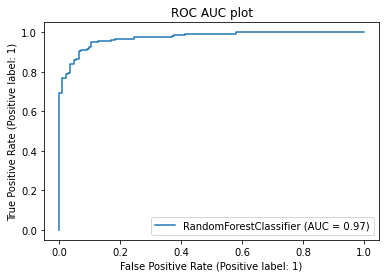

In [241]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x1_test,y_test)
plt.title('ROC AUC plot')
plt.show()

- Our final accuracy is 91.67% and AUC score is 97%

### Saving Model

In [242]:
import joblib

In [243]:
joblib.dump(GCV.best_estimator_,'InsuranceFraudClaim.pkl')

['InsuranceFraudClaim.pkl']